<a href="https://colab.research.google.com/github/cameronv10/Project-2/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd

def stocks(ticker=True):
  url = 'https://www.alphavantage.co/query?function=TIME_SERIES_WEEKLY&symbol='+ticker+'&apikey=6JKXZSE93BPMCPCY'
  r = requests.get(url)
  data = r.json()
  stocks=pd.DataFrame.from_dict(data['Weekly Time Series'], orient='index')
  stocks.rename(columns={'1. open': 'open', '2. high': 'high', '3. low': 'low', '4. close': 'close', '5. volume': 'volume'}, inplace=True)
  stocks.reset_index(inplace=True)
  stocks=stocks.rename(columns = {'index':'date'})
  stocks['ticker']= ticker
  return stocks 

In [25]:
Stock=stocks(ticker='A')

In [30]:
Stock['date']=pd.to_datetime(Stock['date'])
Stock.dtypes
Stock.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'ticker'], dtype='object')

In [32]:
column_names= Stock.columns
for i in column_names[1:6]:
  Stock[i]= Stock[i].astype('float')
  Stock.dtypes

No handles with labels found to put in legend.


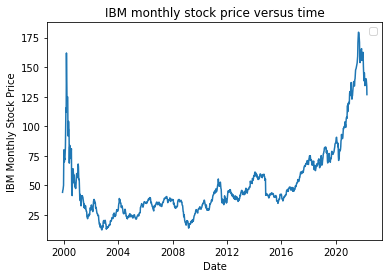

In [33]:
import matplotlib.pyplot as plt

plt.plot(Stock['date'], Stock['high'])
plt.title('IBM monthly stock price versus time')
plt.xlabel('Date')
plt.ylabel('IBM Monthly Stock Price')
plt.legend()
plt.show()